In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from imblearn.over_sampling import SMOTE
sns.set

import warnings
from google.colab import files
warnings.filterwarnings('ignore')

#**Datathon**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv")
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
df = df.rename(columns={'Agency':'agency', 'Agency Type':'agency_type','Distribution Channel':'distribution_channel','Product Name':'product_name',
           'Duration':'duration','Destination':'destination','Net Sales':'net_sales','Commision (in value)':'commision',
           'Gender':'gender','Age':'age','Claim':'claim'})
df.head()

,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision,gender,age,claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
test_data = test_data.rename(columns={'Agency':'agency', 'Agency Type':'agency_type','Distribution Channel':'distribution_channel','Product Name':'product_name',
           'Duration':'duration','Destination':'destination','Net Sales':'net_sales','Commision (in value)':'commision','Gender':'gender','Age':'age'})

## Missing  Value Handling

In [ ]:
df.isna().sum()

agency                      0
agency_type                 0
distribution_channel        0
product_name                0
duration                    0
destination                 0
net_sales                   0
commision                   0
gender                  34361
age                         0
claim                       0
dtype: int64

In [ ]:
#train and test data
df.drop("gender", axis=1, inplace=True)
test_data.drop("gender", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                48260 non-null  object 
 1   agency_type           48260 non-null  object 
 2   distribution_channel  48260 non-null  object 
 3   product_name          48260 non-null  object 
 4   duration              48260 non-null  int64  
 5   destination           48260 non-null  object 
 6   net_sales             48260 non-null  float64
 7   commision             48260 non-null  float64
 8   age                   48260 non-null  int64  
 9   claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.7+ MB


## Label Encoding and One Hot Encoding

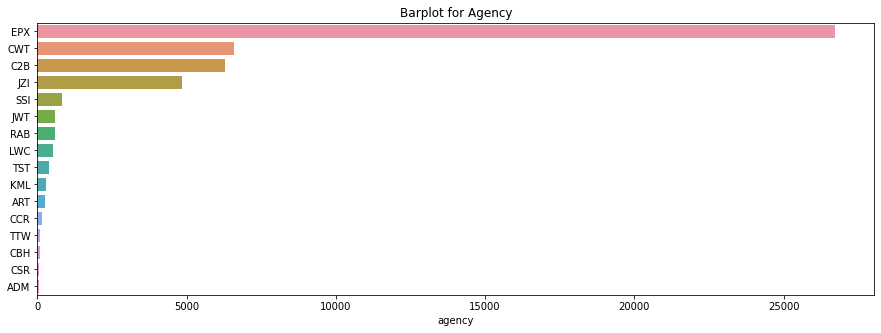

In [ ]:
# for col in (train.select_dtypes(include='object').columns):
#   plt.figure(figsize=(15,7))
#   plt.title("Barplot for")
#   sns.barplot(x=train[col].value_counts(), y = train[col].value_counts().index.tolist())
#   plt.show()

plt.figure(figsize=(15,5))
plt.title("Barplot for Agency")
sns.barplot(x=df.agency.value_counts(), y = df.agency.value_counts().index.tolist())
plt.show()

Travel Agency    34917
Airlines         13343
Name: agency_type, dtype: int64


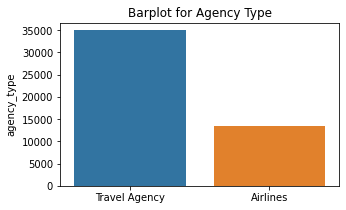

In [ ]:
print(df.agency_type.value_counts())

plt.figure(figsize=(5,3))
plt.title("Barplot for Agency Type")
sns.barplot(x=df.agency_type.value_counts().index.tolist(), y = df.agency_type.value_counts())
plt.show()

Online     47434
Offline      826
Name: distribution_channel, dtype: int64


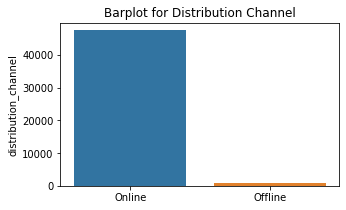

In [ ]:
print(df.distribution_channel.value_counts())

plt.figure(figsize=(5,3))
plt.title("Barplot for Distribution Channel")
sns.barplot(x=df.distribution_channel.value_counts().index.tolist(), y = df.distribution_channel.value_counts())
plt.show()

The number of unique data :  26


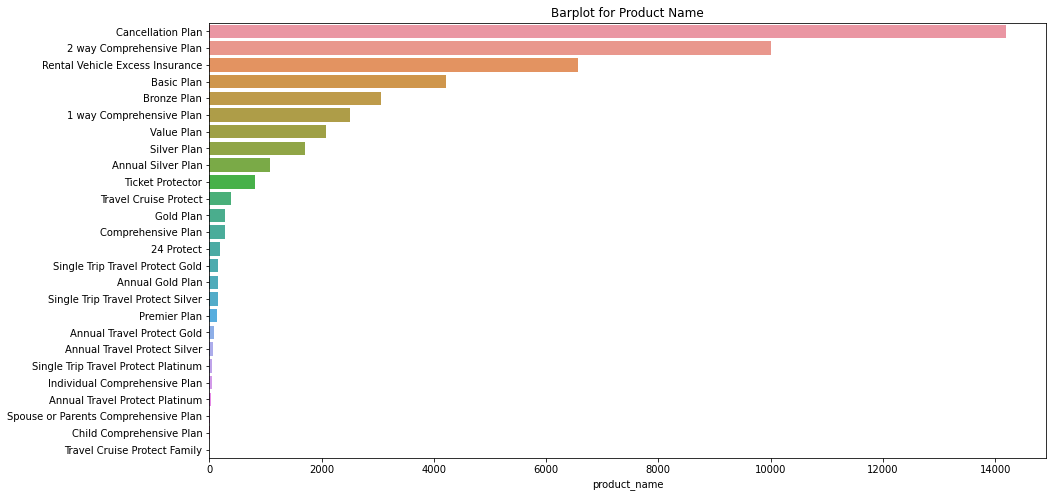

In [ ]:
print("The number of unique data : ", df.product_name.nunique())
plt.figure(figsize=(15,8))
plt.title("Barplot for Product Name")
sns.barplot(x=df.product_name.value_counts(), y = df.product_name.value_counts().index.tolist())
plt.show()

In [ ]:
print("The number of unique destination: ", df.destination.nunique())

The number of unique destination:  141


One Hot Encoding

In [ ]:
#OHE on training data
ohe = OneHotEncoder(sparse=False)
df_encode = pd.DataFrame(ohe.fit_transform(df[['agency', 'agency_type', 'distribution_channel']]))
df_encode.columns = ohe.get_feature_names(['agency', 'agency_type', 'distribution_channel'])
df.drop(['agency', 'agency_type', 'distribution_channel'] ,axis=1, inplace=True)
df= pd.concat([df, df_encode], axis=1)
df.head()

#OHE on test data
ohe = OneHotEncoder(sparse=False)
test_encode = pd.DataFrame(ohe.fit_transform(test_data[['agency', 'agency_type', 'distribution_channel']]))
test_encode.columns = ohe.get_feature_names(['agency', 'agency_type', 'distribution_channel'])
test_data.drop(['agency', 'agency_type', 'distribution_channel'] ,axis=1, inplace=True)
test_data= pd.concat([test_data, test_encode], axis=1)
test_data.head()

,product_name,duration,destination,net_sales,commision,age,agency_ADM,agency_ART,agency_C2B,agency_CBH,agency_CCR,agency_CSR,agency_CWT,agency_EPX,agency_JWT,agency_JZI,agency_KML,agency_LWC,agency_RAB,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online
0,Cancellation Plan,24,HONG KONG,27.0,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Cancellation Plan,51,JAPAN,45.0,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Cancellation Plan,52,JAPAN,21.0,0.0,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Cancellation Plan,89,SINGAPORE,11.0,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,Cancellation Plan,5,MALAYSIA,10.0,0.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Label Encoding

In [ ]:
labelencoder = LabelEncoder()
#data train
df.product_name = labelencoder.fit_transform(df.product_name)
df.destination = labelencoder.fit_transform(df.destination)
#data test
test_data.product_name = labelencoder.fit_transform(test_data.product_name)
test_data.destination = labelencoder.fit_transform(test_data.destination)

In [ ]:
df.head()

,product_name,duration,destination,net_sales,commision,age,claim,agency_ADM,agency_ART,agency_C2B,agency_CBH,agency_CCR,agency_CSR,agency_CWT,agency_EPX,agency_JWT,agency_JZI,agency_KML,agency_LWC,agency_RAB,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online
0,16,61,131,19.8,11.88,29,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,10,93,90,63.0,0.00,36,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,22,132,22.0,0.00,25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,17,14,112,54.5,13.63,24,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,10,90,137,10.0,0.00,23,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Train Test Split to Prevent Data Lekage

In [ ]:
input = df.drop("claim", axis=1)
output = df.claim

x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state=1, stratify=output)
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

## Outlier Handling

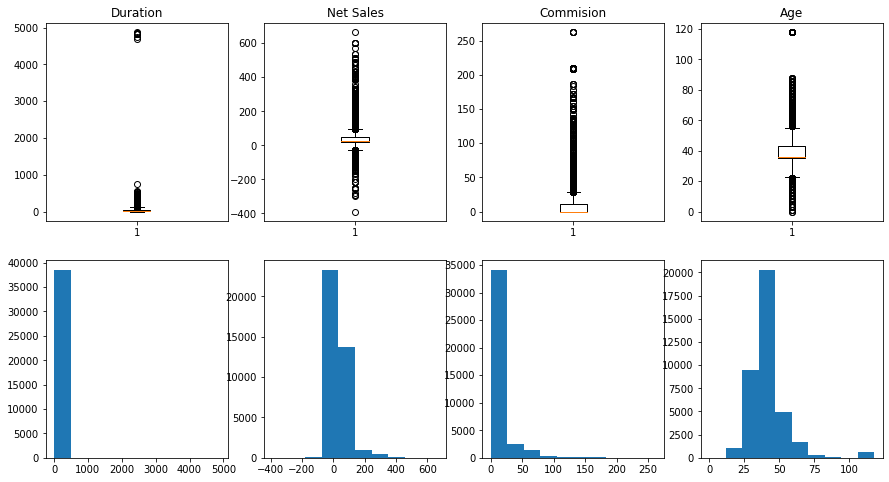

In [ ]:
# duration, net_sales, commision
fig, ax = plt.subplots(2,4, figsize=(15,8))
ax[0,0].boxplot(train.duration)
ax[0,0].set_title("Duration")
ax[0,1].boxplot(train.net_sales)
ax[0,1].set_title("Net Sales")
ax[0,2].boxplot(train.commision)
ax[0,2].set_title("Commision")
ax[0,3].boxplot(train.age)
ax[0,3].set_title("Age")

ax[1,0].hist(train.duration)
ax[1,1].hist(train.net_sales)
ax[1,2].hist(train.commision)
ax[1,3].hist(train.age)
plt.show()

In [ ]:
#cek the outlier 
def outlier_check(data):
  q1, q3 = data.quantile(0.25), data.quantile(0.75)
  iqr = q3-q1
  return (q1-iqr*1.5), (q3+iqr*1.5)

#replace the ourlier with uperbound or lowerbound data
def iqr_replace(lb, ub, col,df):
  df.at[df[df[col]>ub].index.to_list(),col]= ub
  df.at[df[df[col]<lb].index.to_list(),col]= lb
  return df

#data without outlier
def clean_outlier(df, cols):
  df_to_clean = df.copy()
  for col in cols:
    lb, ub = outlier_check(df[col])
    df_to_clean = iqr_replace(lb, ub, col, df_to_clean)
  return df_to_clean

#Handling outlier using Z-score
def zscore_outlier(df, cols):
  for col in cols:
    mean, std = df[cols].mean(), df[cols].std()
    df['z_score'] = (df[cols]-mean)/std
    df = df[(df.z_score>-3) & (df.z_score<3)]
    df.reset_index(inplace=True)
    df.drop(['z_score','index'], axis=1, inplace=True)
  return df

In [ ]:
train = zscore_outlier(train, ['duration'])
train = zscore_outlier(train, ['net_sales'])
train = zscore_outlier(train, ['commision'])
train = zscore_outlier(train, ['age'])
train.shape[0]

35297

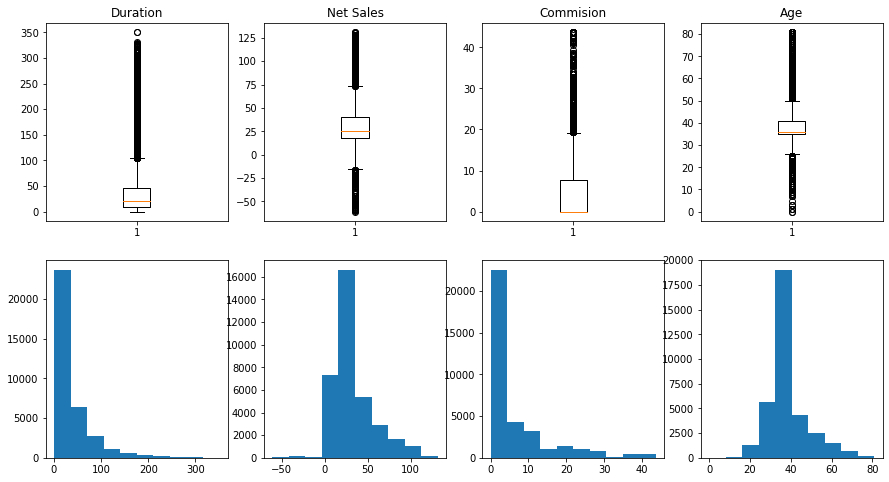

In [ ]:
# duration, net_sales, commision
fig, ax = plt.subplots(2,4, figsize=(15,8))
ax[0,0].boxplot(train.duration)
ax[0,0].set_title("Duration")
ax[0,1].boxplot(train.net_sales)
ax[0,1].set_title("Net Sales")
ax[0,2].boxplot(train.commision)
ax[0,2].set_title("Commision")
ax[0,3].boxplot(train.age)
ax[0,3].set_title("Age")

ax[1,0].hist(train.duration)
ax[1,1].hist(train.net_sales)
ax[1,2].hist(train.commision)
ax[1,3].hist(train.age)
plt.show()

In [ ]:
train.describe()

,product_name,duration,destination,net_sales,commision,age,agency_ADM,agency_ART,agency_C2B,agency_CBH,agency_CCR,agency_CSR,agency_CWT,agency_EPX,agency_JWT,agency_JZI,agency_KML,agency_LWC,agency_RAB,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,claim
count,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.0,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000,35297.0,35297.000000,35297.000000,35297.000000,35297.000000,35297.000000
mean,8.967193,36.735190,81.961583,32.266678,5.520493,38.451908,0.000907,0.004646,0.111908,0.001643,0.002550,0.001247,0.115336,0.602431,0.0,0.106666,0.006176,0.007111,0.012862,0.017707,0.008811,0.0,0.253789,0.746211,0.014930,0.985070,0.011276
std,6.417700,44.621924,39.015388,24.571806,9.247811,9.751064,0.030096,0.068006,0.315257,0.040504,0.050432,0.035285,0.319431,0.489402,0.0,0.308693,0.078347,0.084028,0.112682,0.131886,0.093454,0.0,0.435185,0.435185,0.121276,0.121276,0.105588
min,0.000000,0.000000,0.000000,-61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,9.000000,55.000000,18.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,10.000000,20.000000,86.000000,25.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000
75%,10.000000,47.000000,112.000000,40.000000,7.700000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.000000
max,25.000000,351.000000,140.000000,131.300000,43.750000,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# #check duration
# lb, ub = outlier_check(train.duration)
# train[train.duration>ub]
# # train[(train.duration<lb) | (train.duration>ub)]

# train_new = clean_outlier(train, ['duration', 'net_sales', 'commision', 'age'])

# fig, ax = plt.subplots(2,4, figsize=(15,8))
# ax[0,0].boxplot(train_new.duration)
# ax[0,0].set_title("Duration")
# ax[0,1].boxplot(train_new.net_sales)
# ax[0,1].set_title("Net Sales")
# ax[0,2].boxplot(train_new.commision)
# ax[0,2].set_title("Commision")
# ax[0,3].boxplot(train_new.age)
# ax[0,3].set_title("Age")

# ax[1,0].hist(train_new.duration)
# ax[1,1].hist(train_new.net_sales)
# ax[1,2].hist(train_new.commision)
# ax[1,3].hist(train_new.age)
# plt.show()

## Data Normalization

In [ ]:
pt = PowerTransformer()
norm_train = pd.DataFrame(pt.fit_transform(train[['duration', 'net_sales', 'commision', 'age']]), columns=['duration', 'net_sales', 'commision', 'age'])
train.drop(['duration', 'net_sales', 'commision', 'age'], axis=1, inplace=True)
train = pd.concat([train, norm_train], axis=1)
train.head()

,product_name,destination,agency_ADM,agency_ART,agency_C2B,agency_CBH,agency_CCR,agency_CSR,agency_CWT,agency_EPX,agency_JWT,agency_JZI,agency_KML,agency_LWC,agency_RAB,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,claim,duration,net_sales,commision,age
0,1,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,-0.828127,3.041139,-0.795918,-0.161953
1,10,120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.136656,-0.724280,-0.795918,1.915483
2,8,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,-0.554780,-0.217881,1.199764,1.454685
3,9,112,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.242659,0.306657,1.224090,-0.767742
4,9,112,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,-0.478960,0.346264,1.232829,2.059819


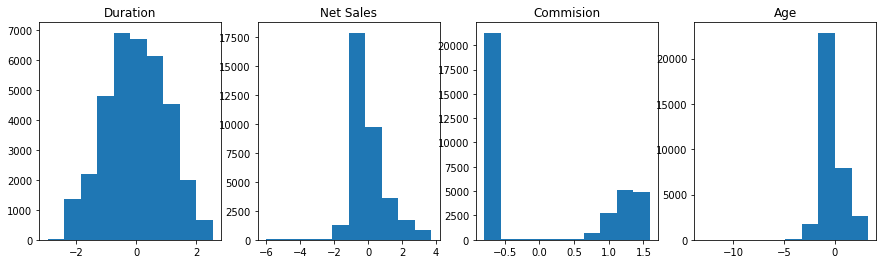

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(15,4))
ax[0].hist(train.duration)
ax[0].set_title("Duration")
ax[1].hist(train.net_sales)
ax[1].set_title("Net Sales")
ax[2].hist(train.commision)
ax[2].set_title("Commision")
ax[3].hist(train.age)
ax[3].set_title("Age")

plt.show()

In [ ]:
#normalization in test
norm_test = pd.DataFrame(pt.transform(test[['duration', 'net_sales', 'commision', 'age']]), columns=['duration', 'net_sales', 'commision', 'age'])
test.drop(['duration', 'net_sales', 'commision', 'age'], axis=1, inplace=True)
test.reset_index(inplace=True)
test = pd.concat([test, norm_test], axis=1)

In [ ]:
#normalization in test data
norm_test_data = pd.DataFrame(pt.transform(test_data[['duration', 'net_sales', 'commision', 'age']]), columns=['duration', 'net_sales', 'commision', 'age'])
test_data.drop(['duration', 'net_sales', 'commision', 'age'], axis=1, inplace=True)
test_data = pd.concat([test_data, norm_test_data], axis=1)

## Scaling
Because the data doesn't normally ditributed, so we use standardization to scale the data

In [ ]:
scale = StandardScaler()
scale_train = pd.DataFrame(scale.fit_transform(train[['duration', 'net_sales', 'commision', 'age','product_name','destination']]), columns=['duration', 'net_sales', 'commision', 'age','product_name','destination'])
train.drop(['duration', 'net_sales', 'commision', 'age','product_name','destination'], axis=1, inplace=True)
train = pd.concat([train, scale_train], axis=1)
train.head()

,agency_ADM,agency_ART,agency_C2B,agency_CBH,agency_CCR,agency_CSR,agency_CWT,agency_EPX,agency_JWT,agency_JZI,agency_KML,agency_LWC,agency_RAB,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,claim,duration,net_sales,commision,age,product_name,destination
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,-0.828127,3.041139,-0.795918,-0.161953,-1.241458,-0.511641
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.136656,-0.724280,-0.795918,1.915483,0.160933,0.974973
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,-0.554780,-0.217881,1.199764,1.454685,-0.150709,-0.767954
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.242659,0.306657,1.224090,-0.767742,0.005112,0.769923
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,-0.478960,0.346264,1.232829,2.059819,0.005112,0.769923


In [ ]:
#scaling in test
scale_test = pd.DataFrame(scale.transform(test[['duration', 'net_sales', 'commision', 'age','product_name','destination']]), columns=['duration', 'net_sales', 'commision', 'age','product_name','destination'])
test.drop(['duration', 'net_sales', 'commision', 'age','product_name','destination'], axis=1, inplace=True)
test = pd.concat([test, scale_test], axis=1)

#scaling in test data
scale_test_data = pd.DataFrame(scale.transform(test_data[['duration', 'net_sales', 'commision', 'age','product_name','destination']]), columns=['duration', 'net_sales', 'commision', 'age','product_name','destination'])
test_data.drop(['duration', 'net_sales', 'commision', 'age','product_name','destination'], axis=1, inplace=True)
test_data = pd.concat([test_data, scale_test_data], axis=1)

## Imbalance data handling

In [ ]:
add_data = test[test.claim == 1]
add_data.reset_index(inplace=True)
add_data.drop(['index'], axis=1, inplace=True)
train = pd.concat([train, add_data], axis=0, ignore_index=True)
train.drop(['level_0'], axis=1, inplace=True)
train.claim.value_counts()

0    34899
1      540
Name: claim, dtype: int64

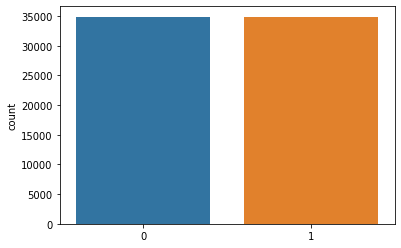

In [ ]:
sm = SMOTE(random_state = 25, sampling_strategy = 1.0)
x_train, y_train = sm.fit_sample(train.drop('claim', axis=1), train.claim)

sns.countplot(y_train)
plt.show()

## Build Model

In [ ]:
x_test, y_test = test.drop("claim", axis=1), test.claim
x_test.drop('index', axis=1, inplace=True)

Random Forest

In [ ]:
params = {'max_depth': [10, 20, 25],
          'min_samples_leaf': [2, 3, 4],
          'min_samples_split': [2, 3],
          'n_estimators': [150, 200]}
f1 = make_scorer(f1_score)
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid=params, cv=4, n_jobs=-1, verbose=2, scoring=f1)
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 17.8min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Accuracy Score Train: ", accuracy_score(grid_search.predict(x_train), y_train))
print("Accuracy Score Test: ", accuracy_score(grid_search.predict(x_test), y_test))
print("F1_score Score Train: ", f1_score(grid_search.predict(x_train), y_train))
print("F1_score Score Test: ", f1_score(grid_search.predict(x_test), y_test))

Accuracy Score Train:  0.979698558697957
Accuracy Score Test:  0.9150435142975549
F1_score Score Train:  0.9799737128481988
F1_score Score Test:  0.21001926782273603


In [ ]:
predict = grid_search.predict(test_data)
result = pd.DataFrame({'prediction':predict})
result.to_csv("quiz1-1.csv", index= False)
files.download('quiz1-1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBoost

In [ ]:
x_train = pd.DataFrame(x_train, columns=x_test.columns)
y_train = pd.DataFrame(y_train, columns=['claim'])

In [ ]:
params = {'learning_rate': [0.15, 0.3, 0.4],
          'min_child_weight':[2,3,4],
          'colsample_bytree':[0.5, 0.7, 1],
          'n_estimators': [200, 300, 400]}

f1 = make_scorer(f1_score)
xgb_model = XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid=params, cv=4, n_jobs=-1, verbose=2, scoring=f1)
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 46.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.15, 0.3, 0.4],
                         'min_child_weight': [2, 3, 4],
   

In [ ]:
print("Accuracy Score Train: ", accuracy_score(grid_search.predict(x_train), y_train))
print("Accuracy Score Test: ", accuracy_score(grid_search.predict(x_test), y_test))
print("F1_score Score Train: ", f1_score(grid_search.predict(x_train), y_train))
print("F1_score Score Test: ", f1_score(grid_search.predict(x_test), y_test))

Accuracy Score Train:  0.9882661394309292
Accuracy Score Test:  0.932656444260257
F1_score Score Train:  0.988220403584219
F1_score Score Test:  0.1514360313315927


In [ ]:
predict = model.predict(test_data)
result = pd.DataFrame({'prediction':predict})
result.to_csv("quiz1-4.csv", index= False)
files.download('quiz1-4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Quiz**

In [ ]:
df = insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


### Missing value handling

In [ ]:
df.Gender.fillna("Not Specified", inplace= True)

In [ ]:
df.drop(["Distribution Channel","Destination", "Agency Type"], axis=1, inplace=True)
df.isna().sum()

Agency                  0
Product Name            0
Duration                0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

### One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
df_encode = pd.DataFrame(ohe.fit_transform(df[['Agency', 'Gender', 'Product Name']]))
df_encode.columns = ohe.get_feature_names(['Agency', 'Gender', 'Product Name'])
df.drop(['Agency', 'Gender', 'Product Name'] ,axis=1, inplace=True)
df= pd.concat([df, df_encode], axis=1)
df.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Gender_F,Gender_M,Gender_Not Specified,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan
0,61,19.8,11.88,29,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93,63.0,0.00,36,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,22.0,0.00,25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,54.5,13.63,24,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90,10.0,0.00,23,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split the data

In [ ]:
input = df.drop('Claim', axis=1)
output = df.Claim 

x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.3, random_state=101)

data1 = pd.concat([x_train, y_train], axis=1)
data1.Claim.value_counts()

0    33269
1      513
Name: Claim, dtype: int64

### Imbalance data handling using smotee

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


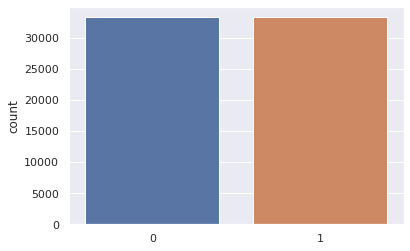

In [ ]:
sm = SMOTE(random_state = 25, sampling_strategy = 1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

sns.countplot(y_train)
plt.show()

### Build Model Using Logistic Regression

In [ ]:
#build model
clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Accuracy Score Train: ", accuracy_score(clf.predict(x_train), y_train))
print("Accuracy Score Test: ", accuracy_score(clf.predict(x_test), y_test))
print("F1_score Score Train: ", f1_score(clf.predict(x_train), y_train))
print("F1_score Score Test: ", f1_score(clf.predict(x_test), y_test))
print("Confussion Train Matrix")
print(classification_report(clf.predict(x_train), y_train))
print("Confussion Test Matrix")
print(classification_report(clf.predict(x_test), y_test))

Accuracy Score Train:  0.7657128257537047
Accuracy Score Test:  0.824906755076668
F1_score Score Train:  0.7509306747191998
F1_score Score Test:  0.09107206884187881
Confussion Train Matrix
              precision    recall  f1-score   support

           0       0.83      0.74      0.78     37218
           1       0.71      0.80      0.75     29320

    accuracy                           0.77     66538
   macro avg       0.77      0.77      0.76     66538
weighted avg       0.77      0.77      0.77     66538

Confussion Test Matrix
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     11884
           1       0.65      0.05      0.09      2594

    accuracy                           0.82     14478
   macro avg       0.74      0.52      0.50     14478
weighted avg       0.80      0.82      0.76     14478



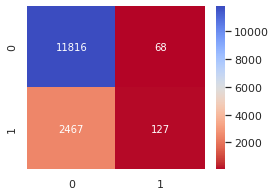

In [ ]:
test_conf = confusion_matrix(clf.predict(x_test), y_test)
plt.figure(figsize=(4,3))
sns.set(font_scale=1) 
sns.heatmap(test_conf, fmt='g', annot=True, annot_kws={"size": 10}, cmap="coolwarm_r")
plt.show()

### Build Model Using Deceision Tree

In [ ]:
#build model
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
print("Accuracy Score Train: ", accuracy_score(model.predict(x_train), y_train))
print("Accuracy Score Test: ", accuracy_score(model.predict(x_test), y_test))
print("F1_score Score Train: ", f1_score(model.predict(x_train), y_train))
print("F1_score Score Test: ", f1_score(model.predict(x_test), y_test))
print("Confussion Train Matrix")
print(classification_report(model.predict(x_train), y_train))
print("Confussion Test Matrix")
print(classification_report(model.predict(x_test), y_test))

Accuracy Score Train:  0.9986774474736241
Accuracy Score Test:  0.9634618041165907
F1_score Score Train:  0.998675855427488
F1_score Score Test:  0.0670194003527337
Confussion Train Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33349
           1       1.00      1.00      1.00     33189

    accuracy                           1.00     66538
   macro avg       1.00      1.00      1.00     66538
weighted avg       1.00      1.00      1.00     66538

Confussion Test Matrix
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14106
           1       0.10      0.05      0.07       372

    accuracy                           0.96     14478
   macro avg       0.54      0.52      0.52     14478
weighted avg       0.95      0.96      0.96     14478



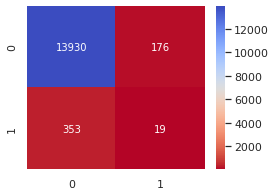

In [ ]:
test_conf = confusion_matrix(model.predict(x_test), y_test)
plt.figure(figsize=(4,3))
sns.set(font_scale=1) 
sns.heatmap(test_conf, fmt='g', annot=True, annot_kws={"size": 10}, cmap="coolwarm_r")
plt.show()

### Random Forest

In [ ]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
print("Accuracy Score Train: ", accuracy_score(model_rf.predict(x_train), y_train))
print("Accuracy Score Test: ", accuracy_score(model_rf.predict(x_test), y_test))
print("F1_score Score Train: ", f1_score(model_rf.predict(x_train), y_train))
print("F1_score Score Test: ", f1_score(model_rf.predict(x_test), y_test))
print("Confussion Train Matrix")
print(classification_report(model_rf.predict(x_train), y_train))
print("Confussion Test Matrix")
print(classification_report(model_rf.predict(x_test), y_test))

Accuracy Score Train:  0.9986774474736241
Accuracy Score Test:  0.9732697886448405
F1_score Score Train:  0.9986766121270453
F1_score Score Test:  0.06746987951807228
Confussion Train Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33311
           1       1.00      1.00      1.00     33227

    accuracy                           1.00     66538
   macro avg       1.00      1.00      1.00     66538
weighted avg       1.00      1.00      1.00     66538

Confussion Test Matrix
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14258
           1       0.07      0.06      0.07       220

    accuracy                           0.97     14478
   macro avg       0.53      0.53      0.53     14478
weighted avg       0.97      0.97      0.97     14478



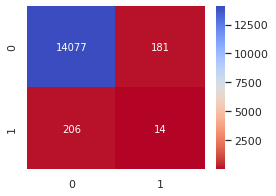

In [ ]:
test_conf = confusion_matrix(model_rf.predict(x_test), y_test)
plt.figure(figsize=(4,3))
sns.set(font_scale=1) 
sns.heatmap(test_conf, fmt='g', annot=True, annot_kws={"size": 10}, cmap="coolwarm_r")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(model_rf.predict(x_train), y_train, average='binary')
print(fscore)
precision,recall,fscore,support=score(model_rf.predict(x_test), y_test, average='binary')
print(fscore)

0.9986766121270453
0.06746987951807228


### Hyperparameter tuning

Random Forest

In [ ]:
params = {'bootstrap': [True],
          'max_depth': [10, 20],
          'min_samples_leaf': [3, 4],
          'min_samples_split': [4, 6],
          'n_estimators': [100, 200],}
model_rf = RandomForestClassifier(random_state=1)
grid_search_1 = GridSearchCV(model_rf, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_search_1.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
grid_search_1.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
print(classification_report(grid_search_1.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14124
           1       0.12      0.06      0.08       354

    accuracy                           0.97     14478
   macro avg       0.55      0.53      0.53     14478
weighted avg       0.96      0.97      0.96     14478



Decission Tree

In [ ]:
params = {
    'max_leaf_nodes': [5, 10, 15, 20],
    'min_samples_split': [4, 6, 8, 10]
}
model = DecisionTreeClassifier(random_state=1)
grid_search_2 = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_search_2.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    8.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 10, 15, 20],
                         'min_samples_split': [4, 6, 8, 10]},
       

In [ ]:
grid_search_2.best_params_

{'max_leaf_nodes': 20, 'min_samples_split': 4}

In [ ]:
print(classification_report(grid_search_2.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13700
           1       0.29      0.07      0.12       778

    accuracy                           0.94     14478
   macro avg       0.62      0.53      0.54     14478
weighted avg       0.91      0.94      0.92     14478



In [ ]:
#which one is the best based on Fscore
print("Accuracy Score Train: ", accuracy_score(grid_search_1.predict(x_train), y_train))
print("Accuracy Score Test: ", accuracy_score(grid_search_1.predict(x_test), y_test))
print("F1_score Score Train: ", f1_score(grid_search_1.predict(x_train), y_train))
print("F1_score Score Test: ", f1_score(grid_search_1.predict(x_test), y_test))
print("====== GridSearchCV_2 ======")
print("Accuracy Score Train: ", accuracy_score(grid_search_2.predict(x_train), y_train))
print("Accuracy Score Test: ", accuracy_score(grid_search_2.predict(x_test), y_test))
print("F1_score Score Train: ", f1_score(grid_search_2.predict(x_train), y_train))
print("F1_score Score Test: ", f1_score(grid_search_2.predict(x_test), y_test))

Accuracy Score Train:  0.981559409660645
Accuracy Score Test:  0.9652576322696506
F1_score Score Train:  0.9815241450964449
F1_score Score Test:  0.08378870673952642
====== GridSearchCV_2 ======
Accuracy Score Train:  0.8324265833057801
Accuracy Score Test:  0.9405304600082884
F1_score Score Train:  0.8104128409168198
F1_score Score Test:  0.11510791366906475


RFE Feature Selection

In [ ]:
# from sklearn.pipeline import Pipeline
# rfe = RFE(estimator=RandomForestClassifier(random_state=1), step=1 )
# model = RandomForestClassifier(random_state=1)
# pipeline = Pipeline(steps=[('s',rfe),('m',model)])
rfe = RFE(estimator=RandomForestClassifier(random_state=1), step=1 )
rfe.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=1, verbose=0,
                                     warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [ ]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False, False, False,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False,  True])

In [ ]:
sum(rfe.support_)

24

In [ ]:
rfe.ranking_

array([ 1,  1,  1,  1, 22, 13,  1, 24, 15, 23,  1,  1,  5,  1,  8,  1, 16,
        2,  7, 14,  1,  1,  1,  1,  1, 20, 10,  1,  3, 21, 11,  1,  1,  1,
       25,  6,  1, 18, 17,  1,  1,  1,  1,  9, 19,  4, 12, 26,  1])

In [ ]:
rfe.get_support(indices=True)

array([ 0,  1,  2,  3,  6, 10, 11, 13, 15, 20, 21, 22, 23, 24, 27, 31, 32,
       33, 36, 39, 40, 41, 42, 48])

In [ ]:
#result of selected feature from RFE Random Forest
input.columns[rfe.support_]

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_C2B',
       'Agency_CWT', 'Agency_EPX', 'Agency_JZI', 'Agency_LWC', 'Gender_F',
       'Gender_M', 'Gender_Not Specified',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan',
       'Product Name_Annual Silver Plan', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Gold Plan',
       'Product Name_Rental Vehicle Excess Insurance',
       'Product Name_Silver Plan',
       'Product Name_Single Trip Travel Protect Gold',
       'Product Name_Single Trip Travel Protect Platinum',
       'Product Name_Value Plan'],
      dtype='object')

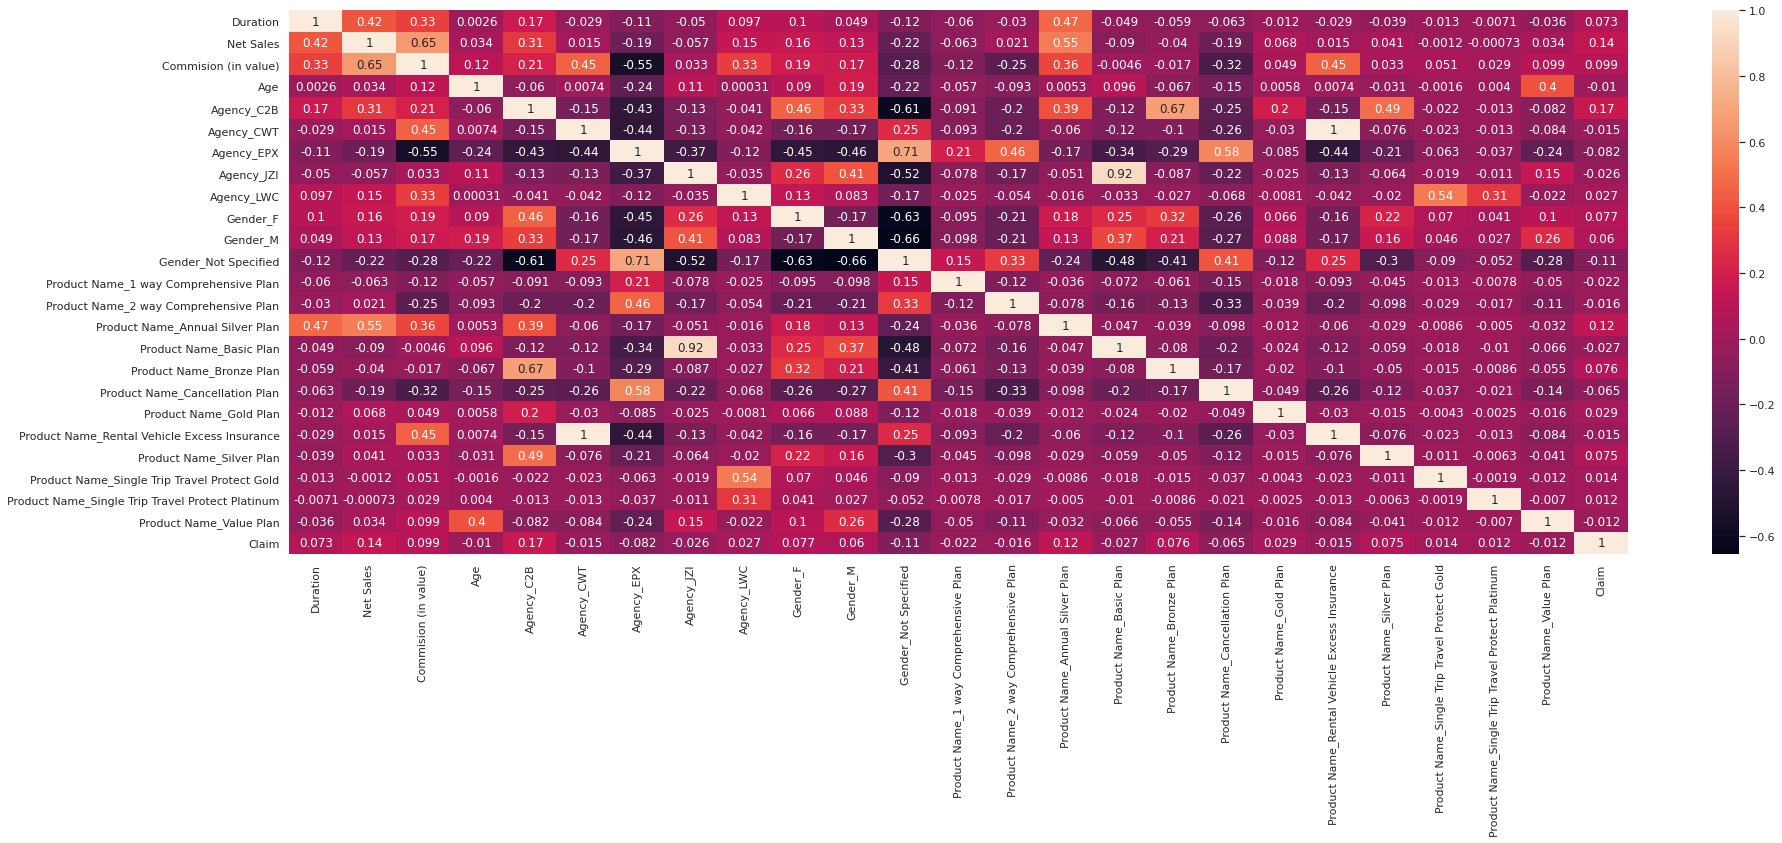

In [ ]:
data = pd.concat([df[input.columns[rfe.support_]], output], axis=1)

plt.figure(figsize=(30,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


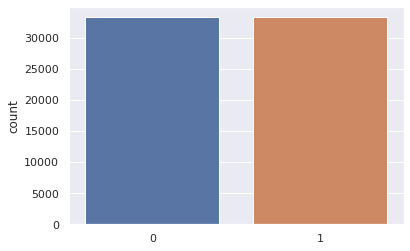

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[input.columns[rfe.support_]], output, test_size=0.3, random_state=101)

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

sns.countplot(y_train)
plt.show()

In [ ]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
print("Accuracy Score Train: ", accuracy_score(model_rf.predict(x_train), y_train))
print("Accuracy Score Test: ", accuracy_score(model_rf.predict(x_test), y_test))
print("F1_score Score Train: ", f1_score(model_rf.predict(x_train), y_train))
print("F1_score Score Test: ", f1_score(model_rf.predict(x_test), y_test))
print("Confussion Train Matrix")
print(classification_report(model_rf.predict(x_train), y_train))
print("Confussion Test Matrix")
print(classification_report(model_rf.predict(x_test), y_test))

Accuracy Score Train:  0.9986774474736241
Accuracy Score Test:  0.9736151402127365
F1_score Score Train:  0.9986764528937552
F1_score Score Test:  0.06372549019607843
Confussion Train Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33319
           1       1.00      1.00      1.00     33219

    accuracy                           1.00     66538
   macro avg       1.00      1.00      1.00     66538
weighted avg       1.00      1.00      1.00     66538

Confussion Test Matrix
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14265
           1       0.07      0.06      0.06       213

    accuracy                           0.97     14478
   macro avg       0.53      0.52      0.53     14478
weighted avg       0.97      0.97      0.97     14478

